# MO-book Style and Hints

## Preamble for Google Colab

A core premise of the book and companion notebooks is that code should be immediately usable through the browser without extensive installation procedures. 

Google Colab is a target platform for every notebook. With a few exceptions, tis preamble is included at the start of every notebook.

In [33]:
# install Pyomo and solvers for Google Colab
import sys
if "google.colab" in sys.modules:
    !wget -N -q https://raw.githubusercontent.com/jckantor/MO-book/main/tools/install_on_colab.py 
    %run install_on_colab.py

It may be worth testing if a similar procedure could be used for Windows or MacOS platforms. Using `wget` on windows, however, apparently requires installation, while `curl` provides sufficient functionality and available on Windows, MacOS, and Google Colab (need to verify this is true for Windows).

In [42]:
# MO-book helper code
!curl -sO https://raw.githubusercontent.com/jckantor/MO-book/main/tools/mobook.py
import mobook
mobook.on_colab()

False

## Matplotlib graphics

* Font styles documented at https://matplotlib.org/stable/api/font_manager_api.html#matplotlib.font_manager.FontProperties

Text(0.5, 1.0, '$sin(x)$')

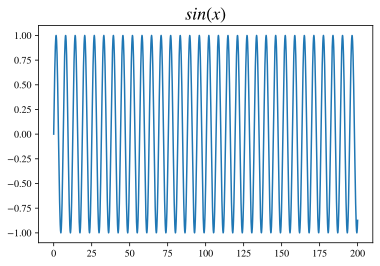

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.style.use('./mobook.mplstyle')

x = np.linspace(0, 200, 2001)
plt.plot(x, np.sin(x))
plt.title("$sin(x)$")

## Main Book Drawings

In [12]:
import matplotlib
%matplotlib inline

use_latex_fonts_on_colab = False

matplotlib.rcParams['text.usetex'] = use_latex_fonts_on_colab

import sys
if 'google.colab' in sys.modules:
    import shutil
    if not shutil.which('pyomo'):
        !pip install pyomo
        assert( shutil.which('pyomo') )

    if use_latex_fonts_on_colab and not shutil.which( '/usr/share/texmf/tex/latex/type1cm' ):
        ! sudo apt-get install texlive-latex-recommended 
        ! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
        ! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
        ! unzip type1cm.zip -d /tmp/type1cm 
        ! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
        ! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
        ! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
        ! sudo texhash 
        !apt install cm-super
else: # locally, assume that LaTeX is installed and use its fonts
    matplotlib.rcParams['text.usetex'] = True 

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

# https://stackoverflow.com/questions/17687213/how-to-obtain-the-same-font-style-size-etc-in-matplotlib-output-as-in-latex
params = {'font.size'   : 10, # the book seems to be in 10pt, change if needed
          'font.family' : 'lmodern',
          }

plt.rcParams.update(params)
default_size_inches = (3.54,3.54) 
plt.rcParams['figure.figsize'] = default_size_inches

In [32]:
!curl -sO https://raw.githubusercontent.com/jckantor/MO-book/main/tools/install_on_colab.py

In [14]:
[ k for k in plt.rcParams.keys() if 'font' in k ]

['font.cursive',
 'font.family',
 'font.fantasy',
 'font.monospace',
 'font.sans-serif',
 'font.serif',
 'font.size',
 'font.stretch',
 'font.style',
 'font.variant',
 'font.weight',
 'legend.fontsize',
 'legend.title_fontsize',
 'mathtext.fontset',
 'pdf.fonttype',
 'pdf.use14corefonts',
 'pgf.rcfonts',
 'ps.fonttype',
 'svg.fonttype']

In [15]:
import pyomo.environ as pyo
import pyomo
pyomo.__version__

'6.4.0'

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import sys
sys.path.append('./code/')
import draw

ModuleNotFoundError: No module named 'anytree'

In [18]:
draw.SetOutputPath( '/work in progress/MO book/results' )

NameError: name 'draw' is not defined

# Chapter one

In [7]:
import sympy, math, numpy as np, sys

x  = sympy.Symbol('x')

# now pi is a symbol, just like x
pi = sympy.Symbol('pi')

# we redefine h using the same right-hand-side code as before, 
# but now with x and pi as symbols
h = (pi*x**2 + 500)/(2*pi*x+50)

# to have the drivative on the symbol pi we need it from the new version of h
hprime = sympy.diff( h, x )

solution = sympy.solveset( sympy.diff( h, x ), x )
solution

{(-5*sqrt(5)*sqrt(4*pi + 5) - 25)/pi, (5*sqrt(5)*sqrt(4*pi + 5) - 25)/pi}

In [8]:
def Preety( formula ):
    from sympy import latex
    from IPython.display import display, Math
    display( Math( latex( formula ) ) )

Preety( h )
Preety( sympy.simplify( h ) )
Preety( hprime )
Preety( sympy.simplify( hprime ) )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
Preety( solution )

s = max(solution.subs( pi, math.pi ).evalf())

print(s)

<IPython.core.display.Math object>

6.95803920980307


In [10]:
def Plot( h, s=None, start=0, stop=20, width=18, height=8, file_name=None ):
    with plt.rc_context({'figure.figsize': (width,height)}): 
        plt.rcParams['figure.figsize'] = (width,height)

        plt.grid()
        plt.xlabel(r'$x$')
        plt.ylabel(r'$h(x)$')

        plt.xticks(np.arange(start, stop+1, step=1))

        x = sympy.Symbol('x')
        f = sympy.lambdify( x, h.subs( pi, math.pi ) )

        import numpy
        x = numpy.linspace(start=start,stop=stop,num=100) 
        y = f(x)

        plt.plot(x,y,label='$h(x)='+sympy.latex(h)+'$',linewidth=3)
        if s is None:
            x = numpy.linspace(start=start,stop=stop,num=stop-start+1) 
            y = f(x)
            plt.plot(x,y, 'bo', label='some points', markersize=8)
        else:
            plt.plot(s,f(s), 'ro', label='$x^*$ optimum', markersize=8)

        plt.legend()

        if file_name is not None:
            plt.savefig( draw._output_path+file_name, bbox_inches='tight', pad_inches=0 )

        plt.show()

In [11]:
Plot( h, None, 0, 20, 8, 5, 'AliceSome.pdf' )

NameError: name 'draw' is not defined

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa73a031b80> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 576x360 with 1 Axes>

In [ ]:
Plot( h, s, 0, 20, 6, 3, 'AliceOptimum.pdf' )

# Chapter two

In [13]:
def SimpleDraw( model ):
    with plt.rc_context({'figure.figsize': (8,6)}):
        return draw.Draw( model, isolines=True, file_name=model.name+'.pdf' )

In [42]:
def CreateBIM():
    m    = pyo.ConcreteModel('BIM')
    
    m.x1 = pyo.Var( within=pyo.NonNegativeReals )
    m.x2 = pyo.Var( within=pyo.NonNegativeReals )

    @m.Objective( sense= pyo.maximize )
    def obj(m):
        return 12*m.x1 + 9*m.x2

    @m.Constraint() 
    def silicon(m):   return    m.x1          <= 1000
    @m.Constraint() 
    def germanium(m): return             m.x2 <= 1500
    @m.Constraint()
    def plastic(m):   return    m.x1 +   m.x2 <= 1750
    @m.Constraint()
    def copper(m):     return 4*m.x1 + 2*m.x2 <= 4800
    
    return m

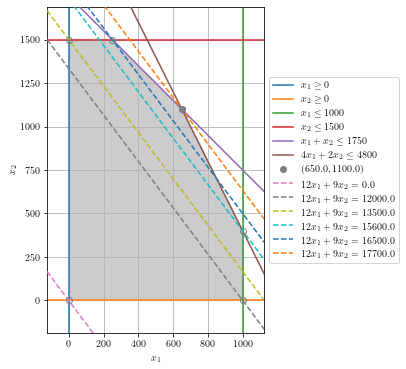

,x1,x2,value
0,0.0,0.0,0.0
1,0.0,1500.0,13500.0
4,250.0,1500.0,16500.0
5,650.0,1100.0,17700.0
2,1000.0,0.0,12000.0
3,1000.0,400.0,15600.0


In [43]:
SimpleDraw( CreateBIM() )

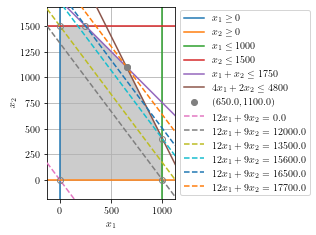

In [16]:
basicfeasiblesolutions = draw.Draw( CreateBIM(), 'BuildingMicrochips.pdf' )

In [17]:
basicfeasiblesolutions.rename(columns={'x1': '$x_1$', 'x2': '$x_2$'}).astype(int).to_latex(draw._output_path+'chips.tex')
if 'google.colab' in sys.modules:
    import os
    from google.colab import files
    files.download( 'chips.tex' )

C:\Users\joaquimg\AppData\Local\Temp\ipykernel_22328\2016893662.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  basicfeasiblesolutions.rename(columns={'x1': '$x_1$', 'x2': '$x_2$'}).astype(int).to_latex(draw._output_path+'chips.tex')


# Chapter three

The first version was a copy of [the model on this deck](http://web.tecnico.ulisboa.pt/mcasquilho/compute/_linpro/TaylorB_module_c.pdf]).

Below several versions of possible models.

In [18]:
def CreateBBaExample():
    model    = pyo.ConcreteModel('BBa')
    
    model.x1 = pyo.Var( within=pyo.NonNegativeReals )
    model.x2 = pyo.Var( within=pyo.NonNegativeReals )

    model.obj = pyo.Objective( sense= pyo.maximize
                                    , expr = 2*model.x1 + 3*model.x2 )

    model.c1  = pyo.Constraint(expr =  2*model.x1 +  1*model.x2 <=  10)
    model.c2  = pyo.Constraint(expr =  3*model.x1 +  6*model.x2 <=  40)
    
    return model

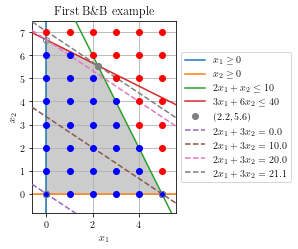

,x1,x2,value
0,0.0,0.0,0.0
1,0.0,6.7,20.0
3,2.2,5.6,21.1
2,5.0,0.0,10.0


In [19]:
draw.Draw( CreateBBaExample(), integer=True, isolines=True, file_name=CreateBBaExample().name+'.pdf', title='First B\&B example' )

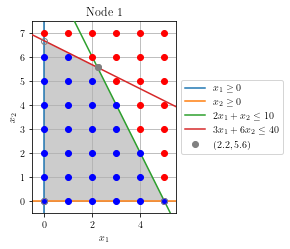

[2.22222222 5.55555556]


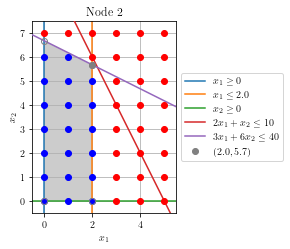

[2.         5.66666667]


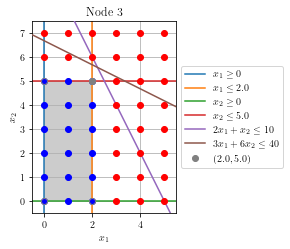

[2. 5.]


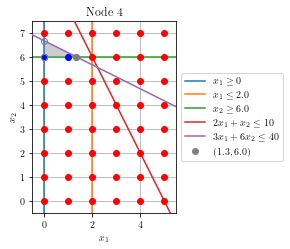

[1.33333333 6.        ]


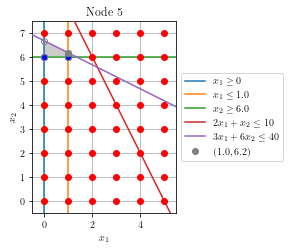

[1.         6.16666667]


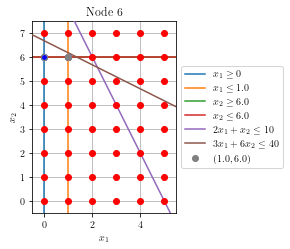

[1. 6.]
    model.name="BBa";
      - termination condition: infeasibleOrUnbounded
      - message from solver: <undefined>


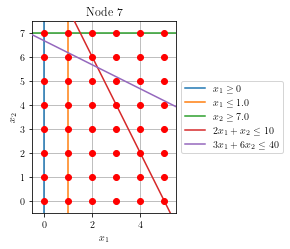

    model.name="BBa";
      - termination condition: infeasibleOrUnbounded
      - message from solver: <undefined>


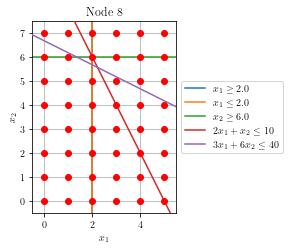

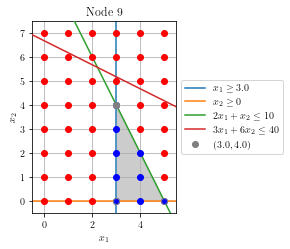

In [20]:
sol,root = draw.BB( CreateBBaExample(), solver='gurobi_direct' )

In [21]:
draw.ToTikz(root, 'BBa.tex', fig_only=True )

In [22]:
draw.DrawBB(root, 'BB.pdf')

In [23]:
draw.DotExporter(root).to_picture(draw._output_path+'BBplain.pdf')

In [24]:
def CreateBBbExample():
    m    = pyo.ConcreteModel('BBb')
    
    m.x1 = pyo.Var( within=pyo.NonNegativeReals )
    m.x2 = pyo.Var( within=pyo.NonNegativeReals )

    m.obj= pyo.Objective( sense= pyo.maximize
                        , expr =  1*m.x1 + 2*m.x2 )

    m.c1 = pyo.Constraint(expr = -4*m.x1 + 5*m.x2 <= 11)
    m.c2 = pyo.Constraint(expr =  5*m.x1 - 2*m.x2 <=  9)
    
    return m

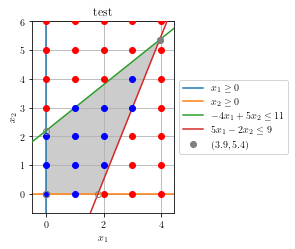

,x1,x2,value
0,0.0,0.0,0.0
1,0.0,2.2,4.4
2,1.8,0.0,1.8
3,3.9,5.4,14.6


In [25]:
draw.Draw( CreateBBbExample(), integer=True, isolines=False, file_name=None, title='test' )

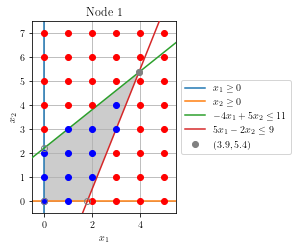

[3.94117647 5.35294118]


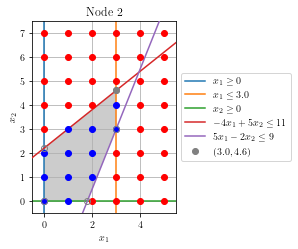

[3.  4.6]


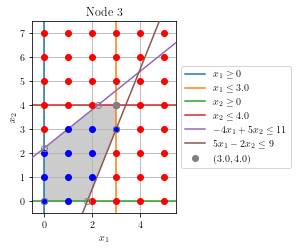

[3. 4.]
    model.name="BBb";
      - termination condition: infeasibleOrUnbounded
      - message from solver: <undefined>


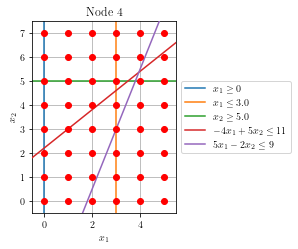

    model.name="BBb";
      - termination condition: infeasible
      - message from solver: <undefined>


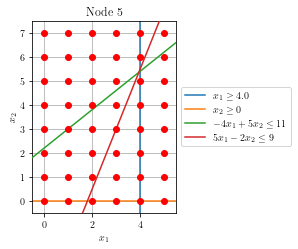

In [26]:
sol,root = draw.BB( CreateBBbExample(), solver='gurobi_direct' )

In [27]:
draw.ToTikz(root, 'BBb.tex', fig_only=True )

In [28]:
draw.DotExporter(root).to_dotfile(draw._output_path+'test.dot')

In [29]:
draw.DrawBB(root,'BBBook.pdf')

In [30]:
def CreateBIMmodified():
    m    = pyo.ConcreteModel('BIMmodified')
    
    m.x1 = pyo.Var( within=pyo.NonNegativeReals )
    m.x2 = pyo.Var( within=pyo.NonNegativeReals )

    m.obj       = pyo.Objective( sense= pyo.maximize
                               , expr = 12*m.x1 + 9*m.x2 )

    m.silicon   = pyo.Constraint(expr =    m.x1          <= 900 )
    m.germanium = pyo.Constraint(expr =             m.x2 <= 1350)
    m.plastic   = pyo.Constraint(expr =    m.x1 +   m.x2 <= 1801)
    m.copper    = pyo.Constraint(expr =  4*m.x1 + 2*m.x2 <= 4903)
    
    return m

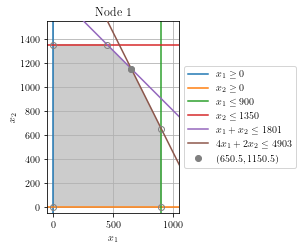

[ 650.5 1150.5]


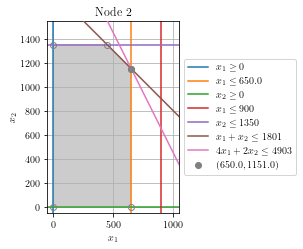

[ 650. 1151.]


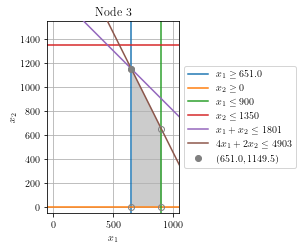

In [31]:
sol,root = draw.BB( CreateBIMmodified(), solver='gurobi_direct', draw_integer=False, xlim=(-50,1050), ylim=(-50,1550) )

In [32]:
draw.ToTikz(root, 'BIMmodified.tex', fig_only=True )

In [33]:
def CreateBIMperturbed():
    m    = pyo.ConcreteModel('BIMperturbed')
    
    m.x1 = pyo.Var( within=pyo.NonNegativeReals )
    m.x2 = pyo.Var( within=pyo.NonNegativeReals )

    m.obj       = pyo.Objective( sense= pyo.maximize
                               , expr = 12*m.x1 + 9*m.x2 )

    m.silicon   = pyo.Constraint(expr =    m.x1                <= 1000 )
    m.germanium = pyo.Constraint(expr =                   m.x2 <= 1500)
    m.plastic   = pyo.Constraint(expr =    m.x1    +      m.x2 <= 1750)
    m.copper    = pyo.Constraint(expr =  4.04*m.x1 + 2.02*m.x2 <= 4800)
    
    return m

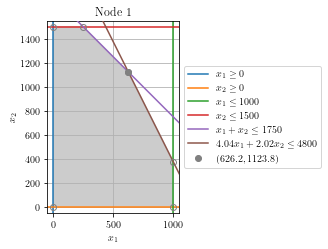

[ 626.23762376 1123.76237624]


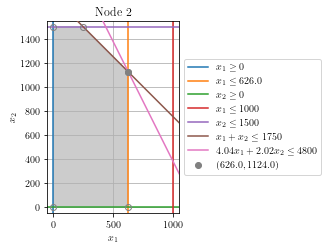

[ 626. 1124.]


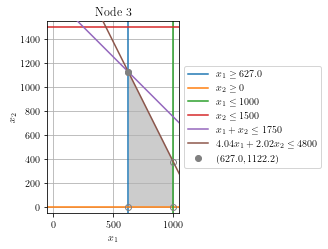

In [34]:
sol,root = draw.BB( CreateBIMperturbed(), solver='gurobi_direct', draw_integer=False, xlim=(-50,1050), ylim=(-50,1550) )

In [35]:
draw.ToTikz(root, 'BIMperturbed.tex', fig_only=True )

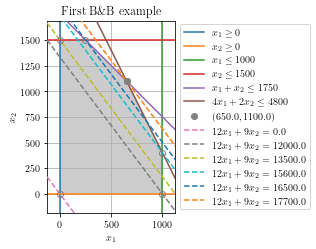

,x1,x2,value
0,0.0,0.0,0.0
1,0.0,1500.0,13500.0
4,250.0,1500.0,16500.0
5,650.0,1100.0,17700.0
2,1000.0,0.0,12000.0
3,1000.0,400.0,15600.0


In [36]:
draw.Draw( CreateBIM(), integer=False, isolines=True, file_name=None, title='First B\&B example' )

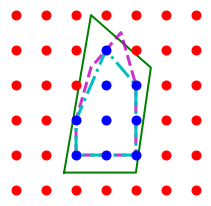

In [37]:
nx,ny = 6,5
F = { (2,1), (3,1), (4,1), (2,2), (3,2), (4,2), (3,3), (4,3), (3,4) }

import itertools  
points = list(itertools.product( range(0,nx+1), range(0,ny+1) ) )
feasible   = [ p for p in points if p in F ]
infeasible = [ p for p in points if not p in F ]
if infeasible:
    plt.plot( *zip(*infeasible), 'ro', zorder=2, markersize=9)
if feasible:
    plt.plot( *zip(*feasible), 'bo', zorder=2, markersize=9)
    
def Pol( coord, style, alpha, width ):
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'
    plt.plot(*zip(*coord),style, alpha=alpha, linewidth=width, zorder=1) 

Pol( [ (1.6,.5), (2.5,5), (4.5,3.5), (4,.5) ], 'g-', 1, 2 )
Pol( [ (2,1), (2,2), (2.5, 3.5), (3.5, 4.5), (4,3), (4,1) ], 'm--', .8, 3 )
Pol( [ (2,1), (2,2), (3,4), (4,3), (4,1) ], 'c-.', 1, 3 )

ax = plt.gca()

# Hide the right and top spines
for position in ['left','right','top','bottom']:
    ax.spines[position].set_visible(False)
    
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.savefig( draw._output_path+'3regions.pdf', bbox_inches='tight', pad_inches=0 )
plt.show()